# <center> <font style="color:rgb(100,109,254)">  Seamless Cloning  </font> </center>

Now Seamless cloning is one of my favourite functions in OpenCV, it allows you to paste one image to another image and make it look natural.

Suppose we have the following image of the forest and an image of a helicopter and we want to paste the helicopter on sky of the forest, the results without seamless cloning will look something like this.

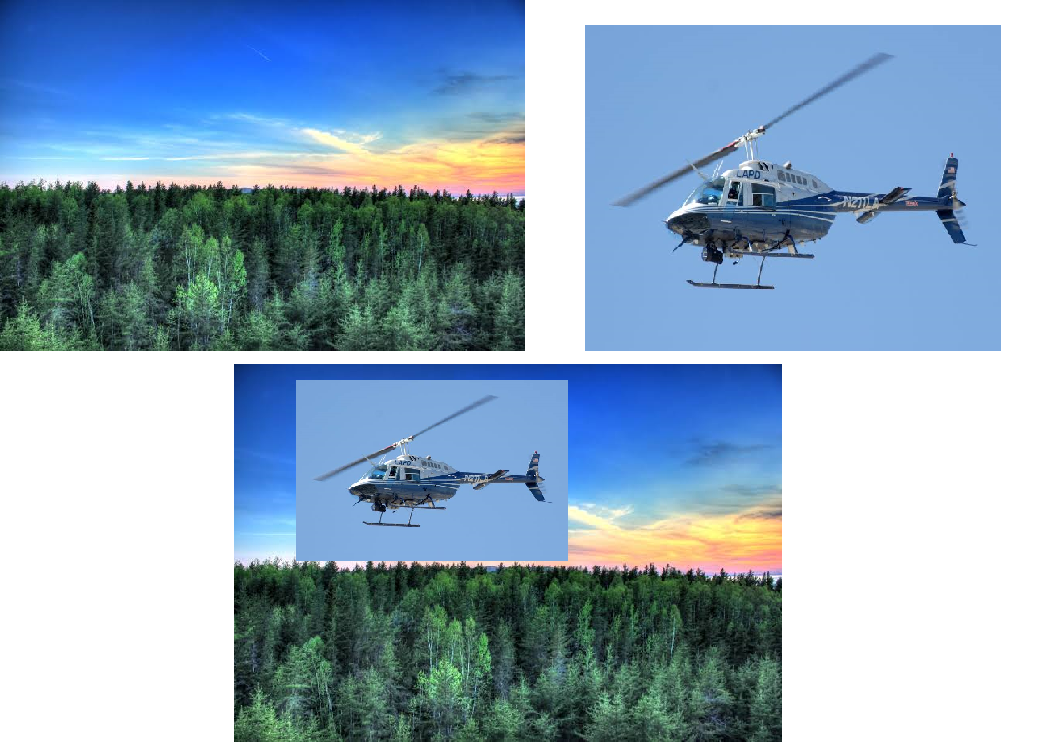

## <font style="color:rgb(134,19,348)"> Seamless Cloning in OpenCV </font>
To use seamless cloning in OpenCV you use the function `cv2.seamlessClone()`

[```blend = cv2.seamlessClone(src, dst, mask, p, flags[, blend])```](https://docs.opencv.org/4.2.0/df/da0/group__photo__clone.html#ga2bf426e4c93a6b1f21705513dfeca49d)

- `src`	Input 8-bit 3-channel image.
- `dst`	Input 8-bit 3-channel image.
- `mask`	Input 8-bit 1 or 3-channel image.
- `p`  Center	Point in dst image where object is placed.
- `blend`	Output image with the same size and type as dst.
- `flags`	Cloning method that could be cv::NORMAL_CLONE, cv::MIXED_CLONE or cv::MONOCHROME_TRANSFER


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Estimate the center point where you will place the source image on the destination image**

<IPython.core.display.Javascript object>


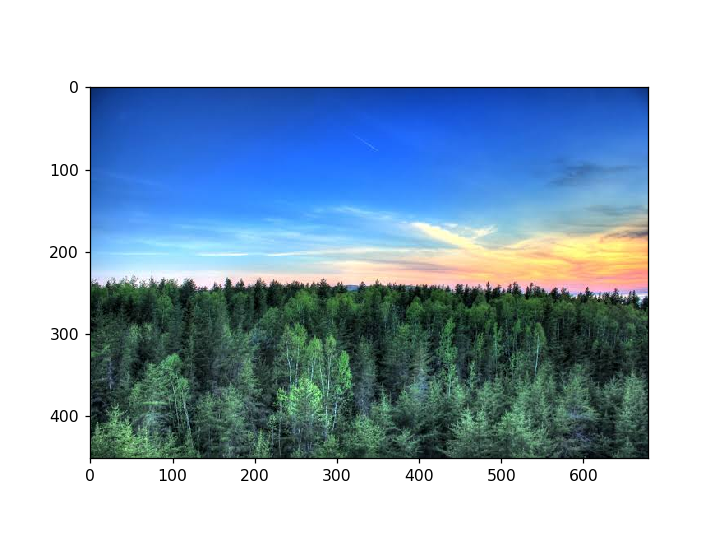

In [4]:
%matplotlib notebook
destination = cv2.imread('media/M4/forest.png',1)

plt.imshow(destination[:,:,::-1])

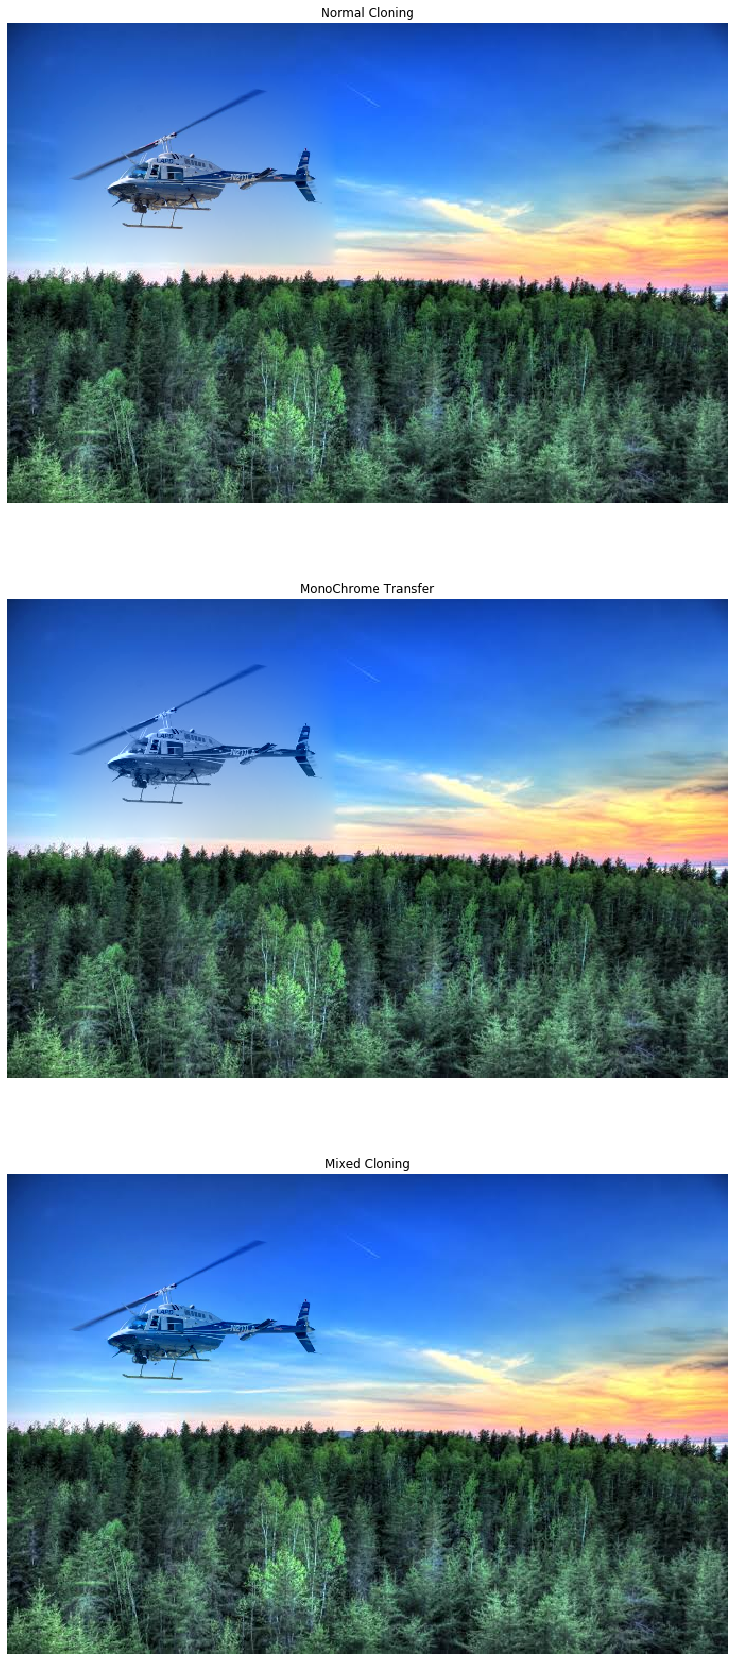

In [5]:
source = cv2.imread('media/M4/helicopter.png',1)
source = cv2.resize(source, (0,0), fx=0.4, fy=0.4)
center_point = (177,137)

# Specify the roi of src image which you want to paste, I'm specifying the full image as white to say I want to paste the whole 
# image  (although a close white filled hull around the helicopter would yeild even better results for normal cloning)
mask = np.ones(source.shape, dtype='uint8') * 255

# We are doing both type of cloning Normal and Mixed, and we're also doing monochrome transfer
cloned_image_normal = cv2.seamlessClone(source, destination, mask, center_point, cv2.NORMAL_CLONE)
cloned_image_mixed = cv2.seamlessClone(source, destination, mask, center_point, cv2.MIXED_CLONE)
Monochrome = cv2.seamlessClone(source, destination, mask, center_point, cv2.MONOCHROME_TRANSFER)


%matplotlib inline
plt.figure(figsize=[30,30])
plt.subplot(311);plt.imshow(cloned_image_normal[:,:,::-1]);plt.title("Normal Cloning");plt.axis('off')
plt.subplot(312);plt.imshow(Monochrome[:,:,::-1]);plt.title("MonoChrome Transfer");plt.axis('off');
plt.subplot(313);plt.imshow(cloned_image_mixed[:,:,::-1]);plt.title("Mixed Cloning");plt.axis('off');

## <font style="color:rgb(134,19,348)"> When to use Normal Cloning </font>
From the above results you might be discouraged from using **NORMAL CLONING** but the thing is you should use normal cloning when the destination patch ( where the source image is to be pasted ) contains weak or no gradients i.e. a smooth area. Consider the below example in which tom & jerry image is pasted on a smooth image.

Text(0.5, 1.0, 'Destination')

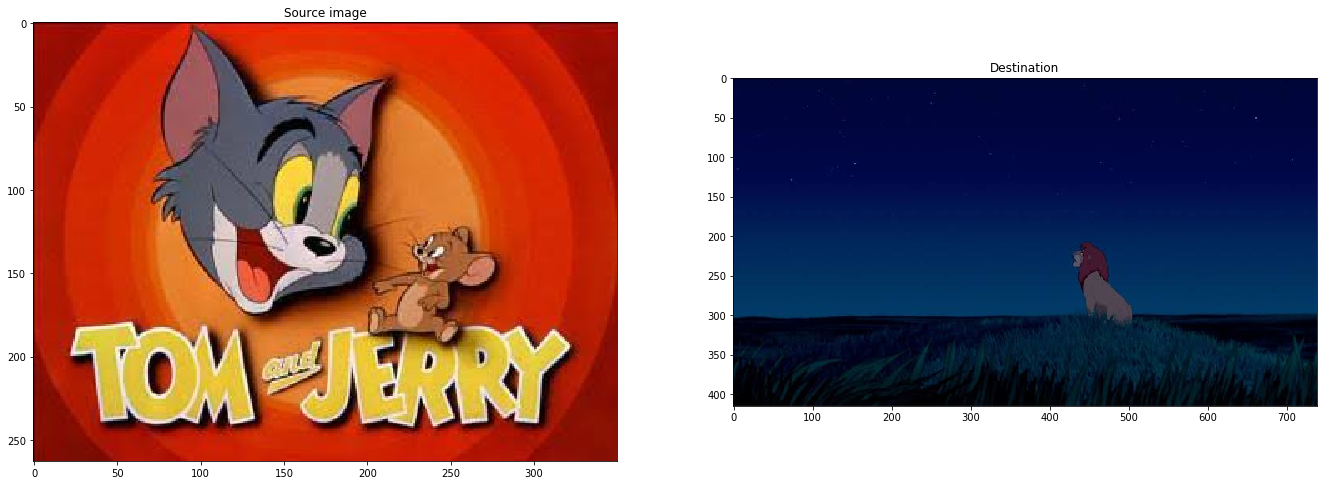

In [6]:
# Load source and destination image 
source = cv2.imread('media/M4/tomandjerry.png',1)
destination = cv2.imread('media/M4/simba.png',1)

%matplotlib inline

# plot the images to see the size and note them for center and resizing ratio for source image
plt.figure(figsize=[23,20])
plt.subplot(121);plt.imshow(source[:,:,::-1]);plt.title("Source image")
plt.subplot(122);plt.imshow(destination[:,:,::-1]);plt.title("Destination")

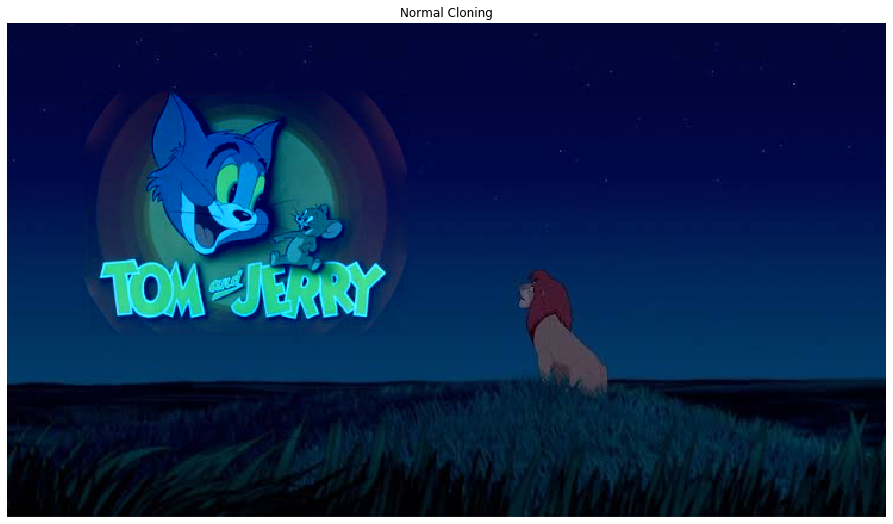

In [7]:
source_resized = cv2.resize(source, (0,0), fx=0.8, fy=0.8)
center_point =(200,160)

mask = np.ones(source_resized.shape, dtype='uint8') * 255

cloned_image_normal = cv2.seamlessClone(source_resized, destination, mask, center_point, cv2.NORMAL_CLONE)

%matplotlib inline
plt.figure(figsize=[23,20])
plt.subplot(211);plt.imshow(cloned_image_normal[:,:,::-1]);plt.title("Normal Cloning");plt.axis('off');

## <font style="color:rgb(134,19,348)">  So how does this Work</font>

Now this Seamless cloning is an implementation of a paper titled  " *Poisson Image Editing* ", by **Patrick Perez**, **Michel Gangnet**, and **Andrew Blake**.

If you remember we have previously tried blending images , in which image intensities or RGB values were blended, it looked good but you can always tell that we're pasting one image onto the other, now in this paper its discussed that working with image gradients will produce much better blending and realistic looking results than working with pixel intensities or color values.

Now there are three modes in Seamless Cloning:

### <font style="color:rgb(134,19,348)"> Normal Cloning: </font>
In normal cloning you replace the destination gradients with the source gradients.

###  <font style="color:rgb(134,19,348)"> Mixed Cloning: </font>
In Mixed Cloning, only the dominant gradient is chosen. So if some parts of destination image has higher gradients like there are sharp edges etc then those parts will be shown, similarly high gradient parts of source image will be shown.

### <font style="color:rgb(134,19,348)"> Monochrome Transfer:  </font>
In this you do not transfer any color/intensity information, only gradients (texture information) are sent, this should have been called texture transfer.

## <font style="color:rgb(134,19,348)"> Illumination Change </font>
This is not as impressive as cloning but still its useful for correcting illumination on images its a great function.
> 	dst = cv2.illuminationChange(src, mask[, dst[, alpha[, beta]]])

- `src`	Input 8-bit 3-channel image.
- `mask`	Input 8-bit 1 or 3-channel image.
- `dst`	Output image with the same size and type as src.
- `alpha`	Value ranges between 0-2.
- `beta`	Value ranges between 0-2.

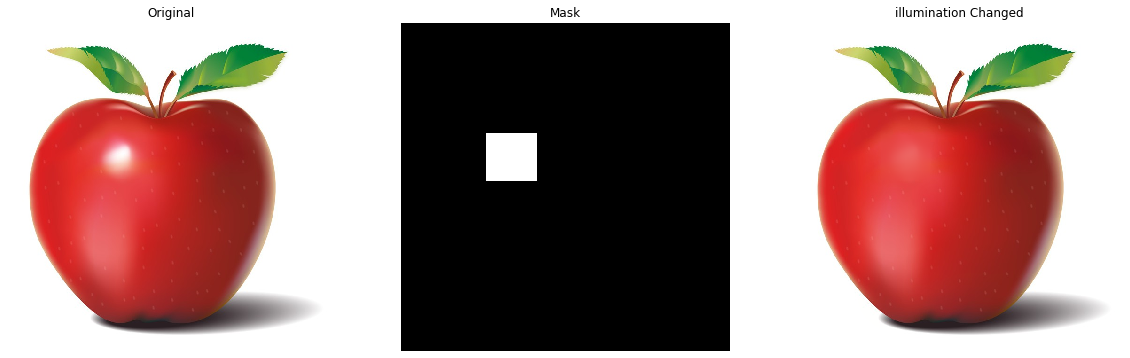

In [8]:
src = cv2.imread('media/M4/applebright.jpg',1)
mask = cv2.imread('media/M4/applebrightmask.jpg',0)

result = cv2.illuminationChange(src, mask , alpha=0.05)

plt.figure(figsize=[20,17])
plt.subplot(131);plt.imshow(src[:,:,::-1]);plt.title("Original");plt.axis('off');
plt.subplot(132);plt.imshow(mask,cmap='gray');plt.title("Mask");plt.axis('off');
plt.subplot(133);plt.imshow(result[:,:,::-1]);plt.title("illumination Changed");plt.axis('off');